# Viewing STIS Data

## 1. Import the necessary libraries:

In [1]:
# Import for: Reading in fits file
from astropy.table import Table
from astropy.io import fits

# Import for: Downloading necessary files. (Not necessary if you choose to collect data from MAST)
from astroquery.mast import Observations

# Import for: Managing system variables and paths
from pathlib import Path

# Import for: Plotting and specifying plotting parameters
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,7)
plt.style.use("bmh")

# Import for: Quick Calculation and Data Analysis
import numpy as np

# Import for operations on STIS Data
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/Users/kding/miniconda3/envs/stis/lib/python3.7/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/Users/kding/miniconda3/envs/stis/lib/python3.7/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


## 2. Download STIS Data using astroquery
There are other ways to download data from MAST such as using CyberDuck. We are only showing how to use astroquery in this notebook

In [2]:
# Search target objscy by obs_id
target = Observations.query_criteria(obs_id='odj102010')
# get a list of files assiciated with that target
FUV_list = Observations.get_product_list(target)
# Download only the SCIENCE fits files
Observations.download_products(FUV_list,productType="SCIENCE",extension='fits')

INFO: Found cached file ./mastDownload/HST/odj102010/odj102010_raw.fits with expected size 8429760. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odj102010/odj102010_x1d.fits with expected size 77760. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odj102010/odj102010_x2d.fits with expected size 14474880. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odj102010/odj102010_flt.fits with expected size 10535040. [astroquery.query]


Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/odj102010/odj102010_raw.fits,COMPLETE,None,None
./mastDownload/HST/odj102010/odj102010_x1d.fits,COMPLETE,None,None
./mastDownload/HST/odj102010/odj102010_x2d.fits,COMPLETE,None,None
./mastDownload/HST/odj102010/odj102010_flt.fits,COMPLETE,None,None


By default, the data is downloaded to ./mastDownload/HST/obj102010. The download directory can also be specified through the 'download_dir' parameter in Observations.download_products method.

## 3. Reading in the data

### 3.1 Investigating the Data - Basics
Before doing any operation on the data, we want to first explore the basics and data file structures.

The Aperture extracted, background subtracted, flux and wavelength calibrated spectra data is stored in fits file with suffix x1d. Open the x1d fits file and explore its info and header.

In [3]:
#get information about the fits file
x1d_file=Path("./mastDownload/HST/odj102010/odj102010_x1d.fits")
fits.info(x1d_file)

Filename: mastDownload/HST/odj102010/odj102010_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     274   ()      
  1  SCI           1 BinTableHDU    156   1R x 19C   [1I, 1I, 1024D, 1024E, 1024E, 1024E, 1024E, 1024E, 1024E, 1024I, 1E, 1E, 1I, 1E, 1E, 1E, 1E, 1024E, 1E]   


The primary header that stores keyword information describing the global properties of all of the exposures in the file 

In [4]:
#get header of the fits file
x1d_header_0 = fits.getheader(x1d_file,0)
x1d_header_0

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS file may contain extensions               
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-16' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    1 / Number of extensions                           
FILENAME= 'odj102010_x1d.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

Some other metadata, such as exposure data and time, are stored in the first extension.

In [5]:
x1d_header_1 = fits.getheader(x1d_file,1)
x1d_header_1

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                38946 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'SPORDER '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'NELEM   '           / label for field   2                            
TFORM2  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE3  = 'WAVELENGTH'      

### 3.2 Reading the x1d main data
The main science data is stored at the first extension of the x1d fits file. We first read in the data as an astropy table.

In [6]:
#get data
x1d_data = Table.read(x1d_file,1)
# Display a representation of the data table:
x1d_data

SPORDER,NELEM,WAVELENGTH [1024],GROSS [1024],BACKGROUND [1024],NET [1024],FLUX [1024],ERROR [1024],NET_ERROR [1024],DQ [1024],A2CENTER,EXTRSIZE,MAXSRCH,BK1SIZE,BK2SIZE,BK1OFFST,BK2OFFST,EXTRLOCY [1024],OFFSET
,,Angstroms,Counts/s,Counts/s,Counts/s,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),Counts/s,,pix,pix,pix,pix,pix,pix,pix,pix,pix
int16,int16,float64,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,float32,float32,float32,float32
1,1024,1513.611692349868 .. 1567.668670092399,1.423279 .. 0.04860059,0.0008550065 .. -6.92308e-05,1.422424 .. 0.04866982,1.96904e-12 .. 9.89624e-14,5.507516e-14 .. 1.495948e-14,0.03978601 .. 0.007357089,2564 .. 2564,389.5777,11,1024,5,5,-300,300,382.2857 .. 397.2364,351.8867


In [7]:
# We can also get the columns of this table:
columns = x1d_data.colnames
columns

['SPORDER',
 'NELEM',
 'WAVELENGTH',
 'GROSS',
 'BACKGROUND',
 'NET',
 'FLUX',
 'ERROR',
 'NET_ERROR',
 'DQ',
 'A2CENTER',
 'EXTRSIZE',
 'MAXSRCH',
 'BK1SIZE',
 'BK2SIZE',
 'BK1OFFST',
 'BK2OFFST',
 'EXTRLOCY',
 'OFFSET']

## 4. Plotting the data
### 4.1 Make a simple plot of the spectrum we just collected and read.

In [8]:
# From the astropy table, we first get all the data we need: wavelength, flux, and error
# notice that for astropy table, the column name is case sensitive
wl,flux,err=x1d_data[0]["WAVELENGTH","FLUX","ERROR"]

Text(0, 0.5, 'Flux [ergs/s/cm$^2$/$\\AA$]')

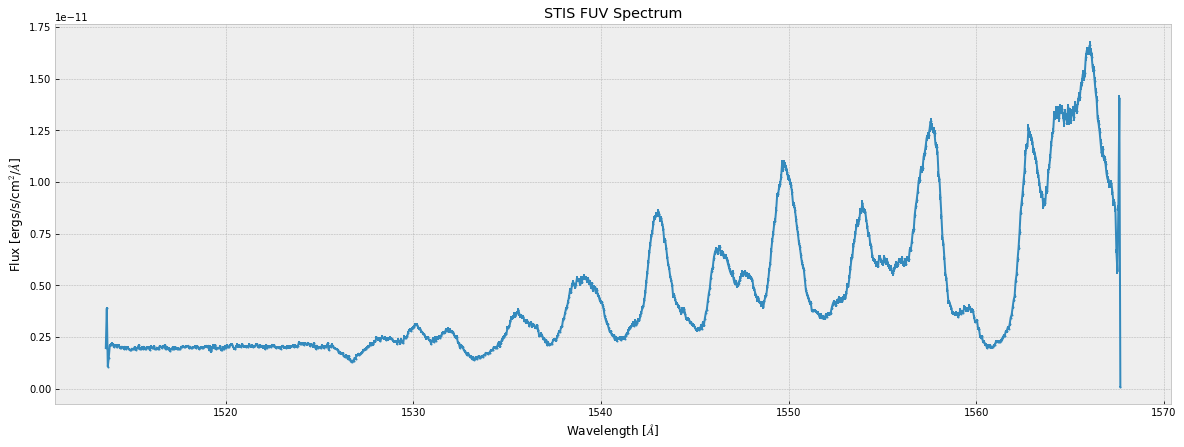

In [9]:
# make a plot of the data, use this cell to specify the format of the plot.
plt.errorbar(wl, flux, err,marker=".",markersize="2")
plt.title("STIS FUV Spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [ergs/s/cm$^2$/$\AA$]")

## 5.Data Quality
### 5.1 Data Quality Frequencies Histogram
Make a histogram according to the data quality flags, and label the bins by what each data quality values actually means.
More info: https://hst-docs.stsci.edu/stisdhb/chapter-2-stis-data-structure/2-5-error-and-data-quality-array

In [10]:
#First get the data quality flag from the x1d fits file, and convert them to log2 values
#The data quality flag is a masked array that "hides" the pixels with no data quality issue. 
#We fill those "good points" with -1 in our case
x1d_dq = x1d_data[0]["DQ"].filled(0)
dq_bits = []
for dq in x1d_dq:
    if dq == 0:
        dq_bits.append(-1)
    else:
        for b in range(0,15):
            if dq & (2**b):
                dq_bits.append(b)

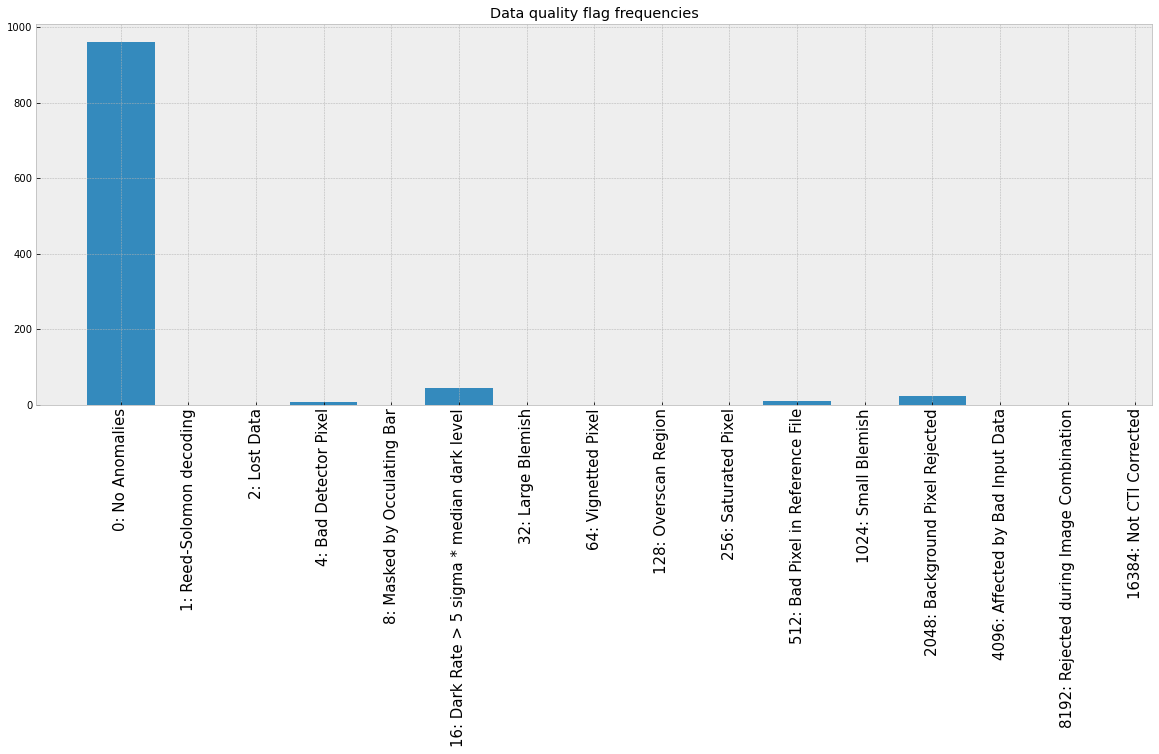

In [11]:
#Assign the meaning of each data quality and make the histogram
meanings = ["No Anomalies","Reed-Solomon decoding","Lost Data","Bad Detector Pixel","Masked by Occulating Bar",
           "Dark Rate > 5 sigma * median dark level","Large Blemish","Vignetted Pixel","Overscan Region",
            "Saturated Pixel","Bad Pixel in Reference File","Small Blemish","Background Pixel Rejected",
           "Affected by Bad Input Data","Rejected during Image Combination","Not CTI Corrected"]
for i in range(len(meanings)):
    meanings[i] = str(int(2**(i-1)))+": "+meanings[i]

bins_ = np.arange(-1, 15)
plt.title("Data quality flag frequencies")
h = plt.hist(dq_bits,bins=bins_)
x = plt.xticks(bins_+0.5, labels=meanings, rotation='vertical', fontsize=15)

### 5.2 Removing "Serious Data Quality"
Through the calibaration pipeline, some data qualities are marked "serious". The value of serious data qualities are marked through "SDQFLAGS". We can decompose that value according to the bits in order to see the specific data quality flags that are marked serious.

In [12]:
sdqFlags_fuv=fits.getheader(x1d_file,1)["SDQFLAGS"]
print("The SDQFLAGS is {flag}, which is in binary {bin_flag},".format(flag=sdqFlags_fuv,bin_flag=bin(sdqFlags_fuv)[2:]))
print("Therefore the following data qualities are marked \"serious\":")
for i in range(15):
    if 2**(i) & sdqFlags_fuv:
        print(meanings[i+1])

The SDQFLAGS is 31743, which is in binary 111101111111111,
Therefore the following data qualities are marked "serious":
1: Reed-Solomon decoding
2: Lost Data
4: Bad Detector Pixel
8: Masked by Occulating Bar
16: Dark Rate > 5 sigma * median dark level
32: Large Blemish
64: Vignetted Pixel
128: Overscan Region
256: Saturated Pixel
512: Bad Pixel in Reference File
2048: Background Pixel Rejected
4096: Affected by Bad Input Data
8192: Rejected during Image Combination
16384: Not CTI Corrected


Text(0, 0.5, 'Flux [$erg\\ s^{-1}\\ cm^{-2}\\ Angstrom^{-1}$]')

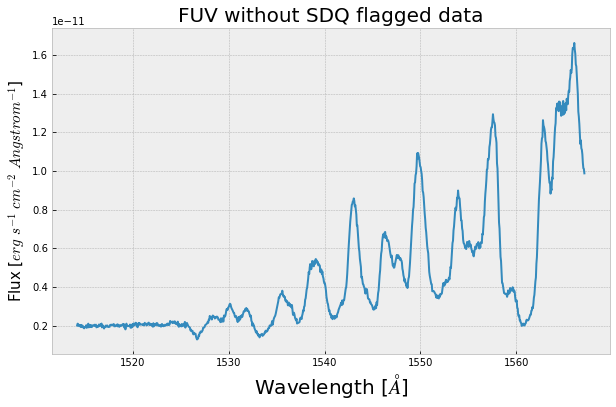

In [13]:
# Filter the datapoints to where there are no serious DQ flags
mask_noSDQ = np.ones(len(x1d_data[0]["WAVELENGTH"]),dtype=bool)
for i in range(0,len(x1d_data[0]["WAVELENGTH"])):
    if x1d_data[0]["DQ"][i] & sdqFlags_fuv:
            mask_noSDQ[i]=False
wvln_noSDQ, flux_noSDQ = x1d_data[0]["WAVELENGTH"][
    mask_noSDQ], x1d_data[0]["FLUX"][mask_noSDQ]

# Make the figure:
plt.figure(figsize=(10, 6))

# Plot the filtered datapoints
plt.plot(wvln_noSDQ, flux_noSDQ)

# Format the figure
plt.title("FUV without SDQ flagged data", size=20)
plt.xlabel('Wavelength [$\AA$]', size=20)
plt.ylabel('Flux [$erg\ s^{-1}\ cm^{-2}\ Angstrom^{-1}$]', size=15)

## 6. STIS Image
### 6.1 Explore image file structure
The rectified, wavelength and flux calibrated first order spectra or Geometrically corrected imaging data is stored in the fits file with the x2d extension. Similar to what we did to the x1d file, we first open the fits file to explore its file structure.

In [14]:
#read in the x2d file and get its info
x2d_file=Path("./mastDownload/HST/odj102010/odj102010_x2d.fits")
fits.info(x2d_file)

Filename: mastDownload/HST/odj102010/odj102010_x2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   ()      
  1  SCI           1 ImageHDU       120   (1201, 1201)   float32   
  2  ERR           1 ImageHDU        61   (1201, 1201)   float32   
  3  DQ            1 ImageHDU        44   (1201, 1201)   int16   


- The first, of extension type SCI, stores the science values.
- The second, of extension type ERR, contains the statistical errors, which are propagated through the calibration process. It is unpopulated in raw data files.
- The third, of extension type DQ, stores the data quality values, which flag suspect pixels in the corresponding SCI data. It is unpopulated in raw data files.

Similarly, we can also get the header from this fits file to see the scientific metadata.

In [15]:
#get header of the fits file
x2d_header = fits.getheader(x2d_file,0)
x2d_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-04-16' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    3 / Number of standard extensions                  
FILENAME= 'odj102010_x2d.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

### 6.2 Show the image
Now we collect the science image data from the fits file and show the image.

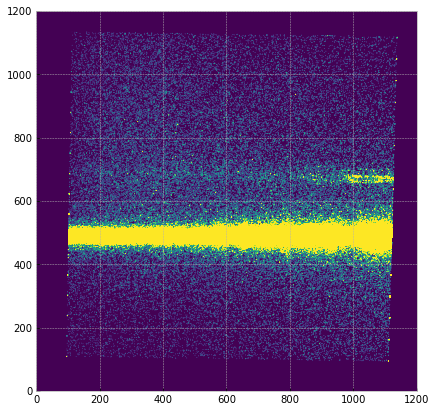

In [16]:
#get data as a numpy array
with fits.open(x2d_file) as hdu_list:
    x2d_data = hdu_list[1].data
# show the image
# We normalize the color of each pixel to a specific range through vmin and vmax. 
# This value typically matches the magnitude of the x2d data, but can be changed to get better imaging result
plt.imshow(x2d_data,origin='lower',vmin=0,vmax=1e-13,cmap="viridis")

### 6.3 Remove the Series Data Quality Pixels

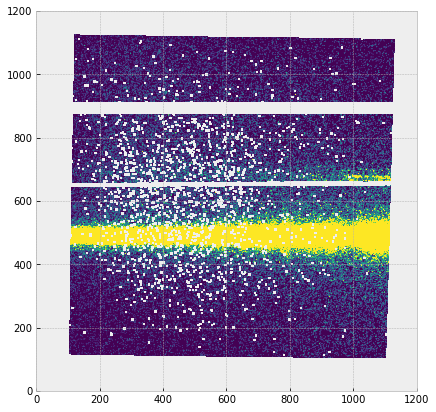

In [17]:
# get the serious data quality flag
sdqFlags_fuv=fits.getheader(x2d_file,1)["SDQFLAGS"]
# get data quality flags of each pixels
with fits.open(x2d_file) as hdu_list:
    x2d_dq = hdu_list[3].data
# create a mask of bad pixels and set them to nan
def check_dq(dq):
    return bool(dq & sdqFlags_fuv)
mask = np.vectorize(check_dq)(x2d_dq)
x2d_mask = np.ma.array(x2d_data,mask=mask,fill_value=np.nan)
# plot the image
plt.imshow(x2d_mask,origin='lower',vmin=0,vmax=1e-13,cmap="viridis")

## 7.Time-Tag Data
In TIME-TAG mode, the position and detection time of every photon is recorded in an event list.
First collect the _tag data:

In [18]:
# Search target objscy by obs_id
target = Observations.query_criteria(obs_id='odgxt9010')
# get a list of files assiciated with that target
FUV_list = Observations.get_product_list(target)
# Download only the SCIENCE fits files
Observations.download_products(FUV_list,productType="AUXILIARY",extension='fits')

INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_jif.fits with expected size 34560. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_jit.fits with expected size 103680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_jwf.fits with expected size 25920. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_jwt.fits with expected size 20160. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_spt.fits with expected size 241920. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_tag.fits with expected size 48064320. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_trl.fits with expected size 37440. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgxt9010_wav.fits with expected size 4262400. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/odgxt9010/odgx

Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/odgxt9010/odgxt9010_jif.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_jit.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_jwf.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_jwt.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_spt.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_tag.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_trl.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_wav.fits,COMPLETE,None,None
./mastDownload/HST/odgxt9010/odgxt9010_wsp.fits,COMPLETE,None,None


### 7.1 Investigating the _tag Data

In [19]:
# get info about the tag extension fits file
tag = Path("./mastDownload/HST/odgxt9010/odgxt9010_tag.fits")
fits.info(tag)

Filename: mastDownload/HST/odgxt9010/odgxt9010_tag.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     218   ()      
  1  EVENTS        1 BinTableHDU    147   4802131R x 4C   [1J, 1I, 1I, 1I]   
  2  GTI           1 BinTableHDU     22   1R x 2C   [1D, 1D]   


The _tag fits file has two binary table extensions: EVENTS and GTI.

In [20]:
# get header of the EVENTS extension
fits.getheader(tag,1)

XTENSION= 'BINTABLE'           / extension type                                 
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   10 / length of first data axis                      
NAXIS2  =              4802131 / length of second data axis                     
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of fields in each table row             
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'EVENTS  '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'odgxt9010                         ' / rootname of the observation set
EXPNAME = 'odgxt9rfq        

Columns in the EVENTS extension:
- TIME: the time each event was recorded relative to the start time
- AXIS1: pixel coordinate along the spectral axis of each event plus a correction term to remove Doppler shifts
- AXIS2: pixel coordinate along the spatial axis
- DETAXIS1: pixel coordinate along the spectral axis without the corretion term on Doppler shifts

In [21]:
# get header of the GTI extension
fits.getheader(tag,2)

XTENSION= 'BINTABLE'           / extension type                                 
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   16 / length of first data axis                      
NAXIS2  =                    1 / length of second data axis                     
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of fields in each table row             
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'GTI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'odgxt9010                         ' / rootname of the observation set
EXPNAME = 'odgxt9rfq        

Columns in the GTI extension:
- START: start of good time interval
- STOP: end of good time interval

### 7.3 Converting Time_Tag into ACCUM image
Time tag data can be converted into ACCUM image using the inttag method in stistools.\
More information: https://stistools.readthedocs.io/en/latest/inttag.html

In [22]:
# define the output file directory
raw = "./mastDownload/HST/odgxt9010/odgxt9010_raw.fits"
# convert Time_Tag into ACCUM
stistools.inttag.inttag(tag, raw)

imset: 1, start: 0.022625, stop: 2380.222, exposure time: 2380.199375


Then the output file is in the same structure as a STIS image fits file, which we can open and plot in the same way we explored above:

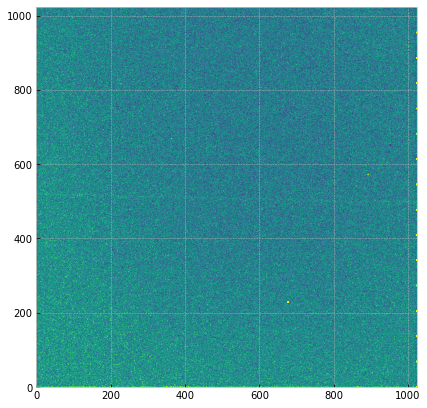

In [23]:
with fits.open(raw) as hdul:
    im = hdul[1].data
plt.imshow(im,origin='lower',vmin=0,vmax=10,cmap="viridis")

inttag with multiple data sets: rcount specifies the number of imsets, imcrements specifies the time interval for each imsets in seconds

In [24]:
stistools.inttag.inttag(tag,raw, rcount = 5, increment = 400)
fits.info(raw)

imset: 1, start: 0.022625, stop: 400.022625, exposure time: 400.0
imset: 2, start: 400.022625, stop: 800.0226250000001, exposure time: 400.00000000000006
imset: 3, start: 800.0226250000001, stop: 1200.022625, exposure time: 400.0
imset: 4, start: 1200.022625, stop: 1600.022625, exposure time: 400.0
imset: 5, start: 1600.022625, stop: 2000.022625, exposure time: 400.0
Filename: ./mastDownload/HST/odgxt9010/odgxt9010_raw.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     218   ()      
  1  SCI           1 ImageHDU       138   (1024, 1024)   float64   
  2  ERR           1 ImageHDU       138   (1024, 1024)   float64   
  3  DQ            1 ImageHDU       139   ()      
  4  SCI           2 ImageHDU       138   (1024, 1024)   float64   
  5  ERR           2 ImageHDU       138   (1024, 1024)   float64   
  6  DQ            2 ImageHDU       139   ()      
  7  SCI           3 ImageHDU       138   (1024, 1024)   float64   
  8  ERR         

The output file is a series of extensions with each imset having a SCI, ERR, and DQ extension, as shown above.